In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import log_loss  # For calculating validation loss


# Importing Keras libraries
#from keras.utils import np_utils              It was older statement. Gave error. Changed by below. In below code need to change np_utils by utils
from keras import utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import KFold
import numpy

import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

import math

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

In [3]:
#Loading Data of Main Database

X_H_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral")]
X_PD_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral")]

In [4]:
import natsort
#print(natsort.natsorted(X_PD_All,reverse=False))
#X_PD_All = natsort.natsorted(X_PD_All,reverse=False)
print(X_H_All)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H18.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H19.jpg', 'C:/Users/Liaqat Ali/Documents

In [5]:
print(X_PD_All)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P15.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P18.jpg', 'C:/Users/Liaqat Ali/Documents

In [6]:
import re

def custom_sort_key(path):
    # Extract the filename from the path
    filename = path.split('\\')[-1]  # Use '\\' for Windows paths

    # Use regex to extract the prefix and suffix numbers
    match = re.match(r'mea(\d+)-P(\d+)\.jpg$', filename)
    
    if match:
        mea_number = int(match.group(1))  # Extract number after 'mea'
        p_number = int(match.group(2))    # Extract number after 'P'
        return (p_number, mea_number)
    else:
        # Return a high default value or handle non-matching cases
        return (float('inf'), float('inf'))

# Filter out non-image files if necessary
X_PD_All_filtered = [path for path in X_PD_All if path.endswith('.jpg')]

# Sort the list using the custom key
X_PD_All_sorted = sorted(X_PD_All_filtered, key=custom_sort_key)

print(X_PD_All_sorted)


['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P15.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P18.jpg', 'C:/Users/Liaqat Ali/Documents

In [7]:
# Print sorted paths
for path in X_PD_All_sorted:
    print(path)

C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P1.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P10.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P11.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P12.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P13.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P14.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P15.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P16.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P17.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P18.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/Pati

In [8]:
def custom_sort_key(path):
    # Extract the filename from the path
    filename = path.split('\\')[-1]  # Adjusted for Windows paths

    # Use regex to extract the prefix and suffix numbers
    match = re.match(r'mea(\d+)-H(\d+)\.jpg$', filename)
    
    if match:
        mea_number = int(match.group(1))  # Extract number after 'mea'
        h_number = int(match.group(2))    # Extract number after 'H'
        return (h_number, mea_number)
    else:
        # Return a high default value or handle non-matching cases
        return (float('inf'), float('inf'))

# Filter out non-image files if necessary
X_H_All_filtered = [path for path in X_H_All if path.endswith('.jpg')]

# Sort the list using the custom key
X_H_All_sorted = sorted(X_H_All_filtered, key=custom_sort_key)

print(X_H_All_sorted)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H18.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H19.jpg', 'C:/Users/Liaqat Ali/Documents

In [9]:
# load the VGG16 network
print("[INFO] loading network...")

# chop the top dense layers, include_top=False
model = VGG16(weights="imagenet", include_top=False)
#model.summary()

[INFO] loading network...


In [10]:
def create_features(dataset, pre_model):

    x_scratch = []

    # loop over the images
    for imagePath in dataset:

        # load the input image and image is resized to 224x224 pixels
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)

        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)

        # add the image to the batch
        x_scratch.append(image)

    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [11]:
H_x_all, H_features_all, H_features_flatten_all = create_features(X_H_All_sorted, model)
print(H_x_all.shape)
print(H_features_all.shape)
print(H_features_flatten_all.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step
(140, 224, 224, 3)
(140, 7, 7, 512)
(140, 25088)


In [12]:
PD_x_all, PD_features_all, PD_features_flatten_all = create_features(X_PD_All_sorted, model)
print(PD_x_all.shape)
print(PD_features_all.shape)
print(PD_features_flatten_all.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step
(124, 224, 224, 3)
(124, 7, 7, 512)
(124, 25088)


In [13]:
X_H_all = H_features_flatten_all
X_PD_all = PD_features_flatten_all

print(X_PD_all.shape)
print(X_H_all.shape)

Y_PD_all = np.ones(124)
Y_H_all = np.zeros(140)
print(Y_PD_all.shape)
print(Y_H_all.shape)

(124, 25088)
(140, 25088)
(124,)
(140,)


In [14]:
Y_all = np.append(Y_PD_all, Y_H_all, axis=0)
print(Y_all.shape)
X_all = np.append(X_PD_all, X_H_all, axis=0)
print(X_all.shape)

(264,)
(264, 25088)


In [15]:
X_HandPD_New = X_all
Y_HandPD_New = Y_all
print(X_HandPD_New.shape)
print(Y_HandPD_New.shape)

(264, 25088)
(264,)


In [16]:
#Importaing Testing Data from HandPD
print(Y_HandPD_New)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:

X_H_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl")]
X_PD_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients")]

In [18]:
import natsort
print(natsort.natsorted(X_PD_All,reverse=False))
X_PD_All = natsort.natsorted(X_PD_All,reverse=False)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0004-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0004-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_H

In [19]:
import natsort
print(natsort.natsorted(X_H_All,reverse=False))
X_H_All = natsort.natsorted(X_H_All,reverse=False)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0098-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0098-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/Spir

In [20]:
# load the VGG16 network
print("[INFO] loading network...")

# chop the top dense layers, include_top=False
model = VGG16(weights="imagenet", include_top=False)
#model.summary()

[INFO] loading network...


In [21]:
H_x_all, H_features_all, H_features_flatten_all = create_features(X_H_All, model)
print(H_x_all.shape)
print(H_features_all.shape)
print(H_features_flatten_all.shape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step
(72, 224, 224, 3)
(72, 7, 7, 512)
(72, 25088)


In [22]:
PD_x_all, PD_features_all, PD_features_flatten_all = create_features(X_PD_All, model)
print(PD_x_all.shape)
print(PD_features_all.shape)
print(PD_features_flatten_all.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step
(296, 224, 224, 3)
(296, 7, 7, 512)
(296, 25088)


In [23]:
X_H_all = H_features_flatten_all
X_PD_all = PD_features_flatten_all

print(X_PD_all.shape)
print(X_H_all.shape)

Y_PD_all = np.ones(296)
Y_H_all = np.zeros(72)
print(Y_PD_all.shape)
print(Y_H_all.shape)

(296, 25088)
(72, 25088)
(296,)
(72,)


In [24]:
Y_HandPD = np.append(Y_PD_all, Y_H_all, axis=0)
print(Y_HandPD.shape)
X_HandPD = np.append(X_PD_all, X_H_all, axis=0)
print(X_HandPD.shape)

(368,)
(368, 25088)


In [25]:
>>> from sklearn.svm import LinearSVC
>>> from sklearn.feature_selection import SelectFromModel

>>> model_FS = SelectKBest(chi2, k=130)
>>> model_FS.fit(X_HandPD_New, Y_HandPD_New)
>>> X_FS_HandPD_New = model_FS.transform(X_HandPD_New)
>>> X_FS_HandPD = model_FS.transform(X_HandPD)
>>> print(X_FS_HandPD_New.shape)
>>> print(X_FS_HandPD.shape)

(264, 130)
(368, 130)


# **Developing Model under LOSO Cross Validation on the New HandPD Data**

**1. Model Development of NET Model**

In [26]:
opt_n1 = 24
opt_n2 =18

In [27]:
print("Done")

Done


In [28]:
TP=0
TN=0
FP=0
FN=0
Best_Acc=0
MOR=0
cor_class=0
MOR=0 #Measure of Reliability
j=1
lb=0
ub=4
Net_Acc=0
#Sample_Acc=0
while j<=66:

    Y_test = Y_HandPD_New[range(lb,ub)]
    Y_train = numpy.delete(Y_HandPD_New, range(lb,ub), 0)

    X_test = X_FS_HandPD_New[range(lb,ub)]
    X_train = numpy.delete(X_FS_HandPD_New, range(lb,ub), 0)




    model=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)


    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    Net_Acc = Net_Acc+scores

    if Y_test.sum()==0:
        if scores>=0.5:
            TN = TN+1
            cor_class=cor_class+1
            MOR=MOR+scores
    if Y_test.sum()==4:
        if scores>0.5:
            TP = TP+1
            cor_class=cor_class+1
            MOR=MOR+scores

    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
Subj_Acc = (cor_class*100)/66
Final_MOR = (MOR*100)/cor_class
FN = 31-TP
FP = 35-TN
Sen = (TP/31)*100
Spec = (TN/35)*100
if (LOSO_Acc>=Best_Acc ):
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)
    print("Subject Acc using TP & TN =", (TP+TN)/66)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
    print("MOR =", Final_MOR)
    print("Bal Acc =", (Sen+Spec)/2)


Best Acc ================ 91.28787878787878
Subjects Acc = 100.0
Subject Acc using TP & TN = 1.0
Sen = 100.0
Spec = 100.0
MCC = 1.0
MOR = 91.28787878787878
Bal Acc = 100.0


# Avg Training and Validation Accuracies

In [29]:
import numpy as np
import math
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Initialize metrics variables
TP = 0
TN = 0
FP = 0
FN = 0
Best_Acc = 0
MOR = 0
cor_class = 0
Net_Acc = 0
train_acc_total = 0  # Variable to accumulate training accuracy
val_acc_total = 0  # Variable to accumulate validation accuracy
j = 1
lb = 0
ub = 4

# Start loop for Leave-One-Subject-Out (LOSO) cross-validation
while j <= 66:

    Y_test = Y_HandPD_New[range(lb, ub)]
    Y_train = np.delete(Y_HandPD_New, range(lb, ub), 0)

    X_test = X_FS_HandPD_New[range(lb, ub)]
    X_train = np.delete(X_FS_HandPD_New, range(lb, ub), 0)

    # Initialize and train the model
    model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(28, 22), random_state=1)
    model.fit(X_train, Y_train)
    
    # Calculate and accumulate training accuracy
    train_acc = model.score(X_train, Y_train)
    train_acc_total += train_acc

    # Make predictions and calculate validation accuracy
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)
    val_acc_total += scores

    # Update net accuracy
    Net_Acc += scores

    # Update confusion matrix and other metrics based on the test set (Y_test and Y_pred)
    if Y_test.sum() == 0:  # Negative class
        if scores >= 0.5:
            TN += 1
            cor_class += 1
            MOR += scores
    if Y_test.sum() == 4:  # Positive class
        if scores > 0.5:
            TP += 1
            cor_class += 1
            MOR += scores

    # Update the bounds for the next fold
    lb += 4
    ub += 4
    j += 1

# Final calculations after loop ends
LOSO_Acc = (Net_Acc * 100) / 66
Subj_Acc = (cor_class * 100) / 66
Final_MOR = (MOR * 100) / cor_class if cor_class > 0 else 0  # To avoid division by zero
FN = 31 - TP
FP = 35 - TN
Sen = (TP / 31) * 100  # Sensitivity (Recall)
Spec = (TN / 35) * 100  # Specificity
Balanced_Acc = (Sen + Spec) / 2  # Balanced Accuracy

# Calculate MCC (Matthews Correlation Coefficient)
MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Calculate average training and validation accuracy
avg_train_acc = (train_acc_total * 100) / 66
avg_val_acc = (val_acc_total * 100) / 66

# If the current LOSO Accuracy is greater than the best accuracy found so far, update and print
if LOSO_Acc >= Best_Acc:
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)
    print("Subject Acc using TP & TN =", (TP + TN) / 66)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", MCC)
    print("MOR =", Final_MOR)
    print("Bal Acc =", Balanced_Acc)

# Print the average training and validation accuracies
print("Average Training Accuracy ================", avg_train_acc)
print("Average Validation Accuracy ================", avg_val_acc)


Best Acc ================ 88.63636363636364
Subjects Acc = 95.45454545454545
Subject Acc using TP & TN = 0.9545454545454546
Sen = 93.54838709677419
Spec = 97.14285714285714
MCC = 0.9090093525768569
MOR = 90.87301587301587
Bal Acc = 95.34562211981566
Average Training Accuracy ================ 100.0
Average Validation Accuracy ================ 88.63636363636364


# **External Validation of the Developed Models on New Data**

In [30]:
# Testing the Developed or Construced Model as Indepdendent Testing or Blind Test or Secondary level testing
# for measureing the Generlaization Capabilities of the developed model.
# From, paper point of view, use the same L1SVM-ANN for the Hand Crafted Features and compare their performance
# and generlization capabilites

In [31]:
################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e.
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_HandPD.shape)
YHandPD=Y_HandPD[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(YHandPD.shape)
##################################

(368,)
(368, 1)


In [32]:
################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e.
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_HandPD_New.shape)
Y_NewHandPD=Y_HandPD_New[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(Y_NewHandPD.shape)
##################################

(264,)
(264, 1)


**1. External Validation of the Optimally Developed NET Model**

In [33]:
# (48, 47) 90.71% Acc on testing and 100% under LOSO CV


import numpy
# The Below are to create empty arrays for ROC Chart
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

Best_Acc=0
MOR=0
cor_class=0
j=1
lb=0
ub=4
Net_Acc=0
#Sample_Acc=0
while j<=92:

    Y_test_sub = YHandPD[range(lb,ub)]
    #Y_train = numpy.delete(Y_Test, range(lb,ub), 0)

    X_test_sub = X_FS_HandPD[range(lb,ub)]
    #X_train = numpy.delete(X_new, range(lb,ub), 0)

    model=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)

    model.fit(X_FS_HandPD_New, Y_HandPD_New)
    Y_pred = model.predict(X_test_sub)
    scores = accuracy_score(Y_test_sub, Y_pred)

    Net_Acc = Net_Acc+scores

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test_sub)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test_sub))
    ####################################################################################

    if scores>0.5:
      cor_class=cor_class+1
      MOR=MOR+scores

    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/92
Subj_Acc = (cor_class*100)/92
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)

Best Acc ================ 88.8586956521739
Subjects Acc = 86.95652173913044


# Learning Curves

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


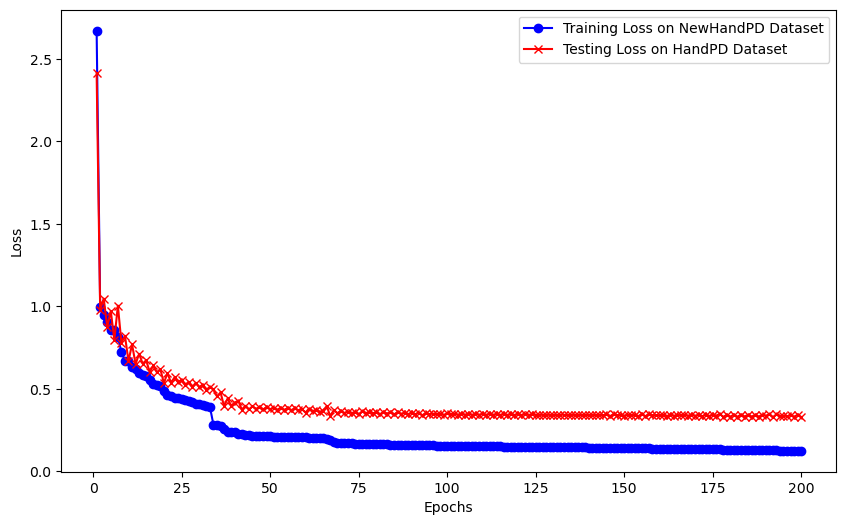

In [34]:
# Initialize lists to store loss values
train_losses = []
val_losses = []

# Initialize the MLPClassifier model with 'lbfgs' solver and 'alpha=1e-5' for regularization
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(opt_n1, opt_n2), random_state=1, max_iter=1, warm_start=True)

# Train the model for multiple epochs
for epoch in range(1, 201):  # Train for 100 epochs
    model.fit(X_FS_HandPD_New, Y_HandPD_New)  # Train the model for one epoch

    # Store the training loss (from the model's loss_curve_ attribute)
    train_losses.append(model.loss_)

    # Predict on the test set and calculate test loss (log loss)
    Y_pred_proba = model.predict_proba(X_FS_HandPD)  # Get probabilities for the test set
    val_loss = log_loss(YHandPD, Y_pred_proba)  # Calculate log loss on test set
    val_losses.append(val_loss)

# Plot the learning curves for training and validation loss
plt.figure(figsize=(10, 6))

# Plot training loss curve
plt.plot(range(1, 201), train_losses, label='Training Loss on NewHandPD Dataset', color='blue', marker='o')

# Plot validation loss curve
plt.plot(range(1, 201), val_losses, label='Testing Loss on HandPD Dataset', color='red', marker='x')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning Curves Spirals: Training Loss on NewHandPD Dataset vs Testing Loss on HandPD Dataset')
plt.legend()

# Save the plot in JPG format
plt.savefig('Loss_learning_curve_spirals.jpg', format='jpg', dpi=300)  # Save as JPG with 300 dpi

# Save the plot in EPS format
plt.savefig('Loss_learning_curve_spirals.eps', format='eps')  # Save as EPS

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


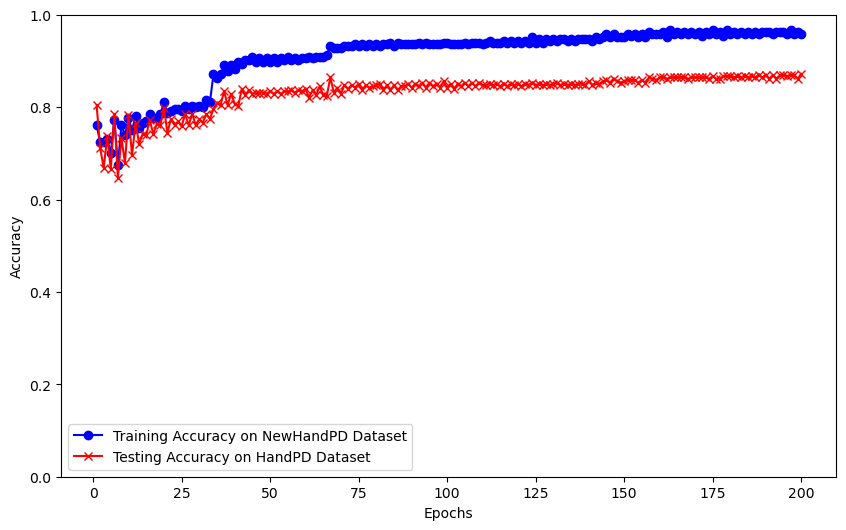

In [35]:
# Initialize lists to store loss values
# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Initialize the MLPClassifier model with 'lbfgs' solver and 'alpha=1e-5' for regularization
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(opt_n1, opt_n2), random_state=1, max_iter=1, warm_start=True)

# Train the model for multiple epochs
for epoch in range(1, 201):  # Train for 100 epochs
    model.fit(X_FS_HandPD_New, Y_HandPD_New)  # Train the model for one epoch

    # Predict on training and testing data
    Y_train_pred = model.predict(X_FS_HandPD_New)
    Y_test_pred = model.predict(X_FS_HandPD)

    # Calculate and store accuracy scores
    train_accuracy = accuracy_score(Y_HandPD_New, Y_train_pred)
    val_accuracy = accuracy_score(Y_HandPD, Y_test_pred)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the accuracy curves for training and validation
plt.figure(figsize=(10, 6))

# Plot training accuracy curve
plt.plot(range(1, 201), train_accuracies, label='Training Accuracy on NewHandPD Dataset', color='blue', marker='o')

# Plot validation accuracy curve
plt.plot(range(1, 201), val_accuracies, label='Testing Accuracy on HandPD Dataset', color='red', marker='x')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('Learning Curves Spirals: Training Accuracy on NewHandPD Dataset vs Testing Accuracy on HandPD Dataset')

# Set x-axis and y-axis limits
#plt.xlim(0, 100)  # X-axis range: 0 to 100 epochs
plt.ylim(0, 1)    # Y-axis range: 0 to 1 (accuracy)

plt.legend()

# Save the plot as JPG and EPS
plt.savefig('accuracy_curve_spirals.jpg', format='jpg', dpi=300)
plt.savefig('accuracy_curve_spirals.eps', format='eps')

# Show the plot
plt.show()